In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

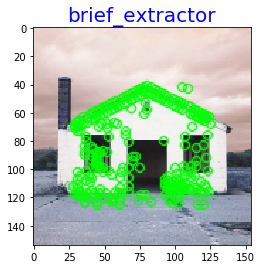

In [2]:
#fast detector with brief
img = cv2.imread('./images/house.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#FAST detector
fast = cv2.FastFeatureDetector_create()

#BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

#find keyboard with STAR
keypoint = fast.detect(gray, None)

keypoint, descriptor = brief.compute(gray, keypoint)

cv2.drawKeypoints(img, keypoint, img, color=(0,255,0))

plt.imshow(img)
plt.title('brief_extractor', fontsize=20, color='b')
plt.show()

Number of keypoint with non max suppression: 847
Number of keypoint without non max suppression: 3132


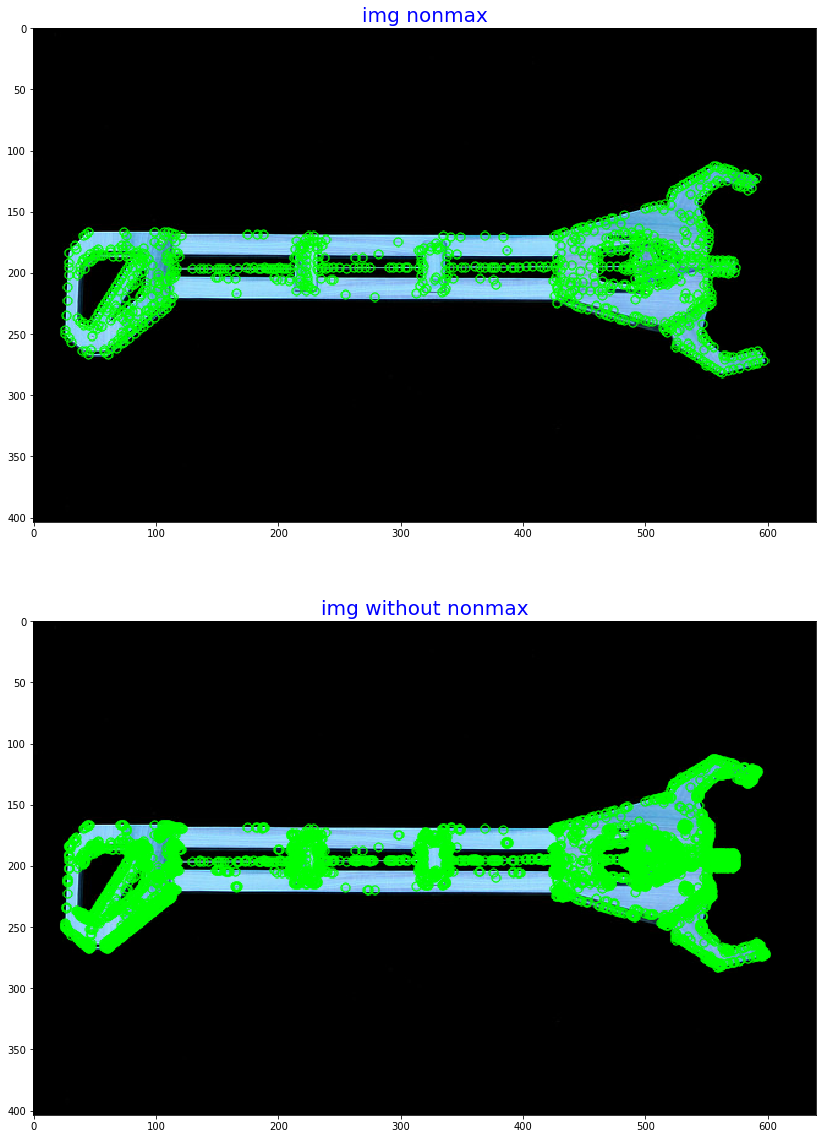

In [3]:
#fast detector
img = cv2.imread('./images/tool.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#FAST detector
fast = cv2.FastFeatureDetector_create()

#detect keypoint
keypoint = fast.detect(gray, None)
print('Number of keypoint with non max suppression:', len(keypoint))

img_nonmax = img.copy()
cv2.drawKeypoints(img, keypoint, img_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


fast.setNonmaxSuppression(False)


keypoint = fast.detect(gray, None)
print('Number of keypoint without non max suppression:', len(keypoint))

img_without_nonmax = img.copy()
cv2.drawKeypoints(img, keypoint, img_without_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(2,1, figsize=(40,20))
ax[0].imshow(img_nonmax)
ax[0].set_title('img nonmax', fontsize=20, color='b')

ax[1].imshow(img_without_nonmax)
ax[1].set_title('img without nonmax', fontsize=20, color='b')

plt.show()

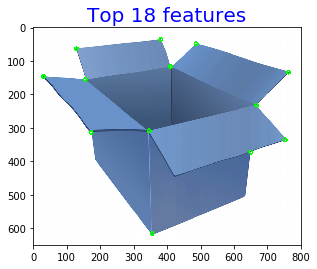

In [4]:
#good features

img = cv2.imread('./images/box.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#max corner = 18
corner = cv2.goodFeaturesToTrack(gray, 18,0.05,20)
corner = np.float32(corner)

for item in corner:
    x, y = item[0]
    cv2.circle(img, (x, y), 5, (0,255,0), 3)
    

plt.imshow(img)
plt.title('Top 18 features', fontsize=20, color='b')
plt.show()

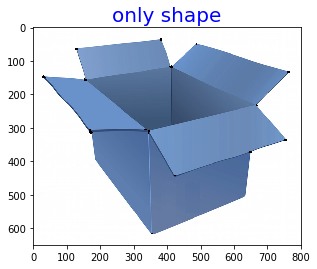

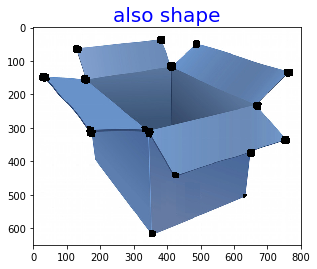

In [5]:
#Harris corner

img = cv2.imread('./images/box.png')


def harris_corner(image, blockSize, ksize, k, title):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray) 

    dst = cv2.cornerHarris(gray, blockSize, ksize, k)
    #dilated making corner
    dst = cv2.dilate(dst, None)
    #threshold optimal
    image[dst>0.005*dst.max()] = [0,0,0]


    plt.imshow(image)
    plt.title(title, fontsize=20, color='b')
    plt.show()
    
harris_corner(img, 4, 5, 0.04, 'only shape')
harris_corner(img, 16, 5, 0.05, 'also shape')

Number of keypoint without non max suppression: 500


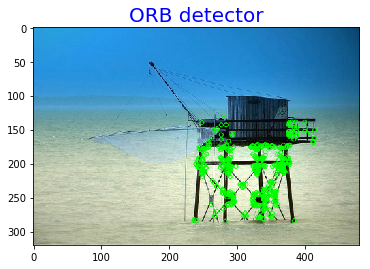

In [6]:
#orb detector

img = cv2.imread('./images/fishing_house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#initiate orb
orb = cv2.ORB_create()
#keypoint
keypoint = orb.detect(gray, None)
print('Number of keypoint without non max suppression:', len(keypoint))

keypoint, descriptor = orb.compute(gray, keypoint)

cv2.drawKeypoints(img, keypoint, img, color=(0,255,0))

plt.imshow(img)
plt.title('ORB detector', fontsize=20, color='b')
plt.show()

Number of keypoint: 290


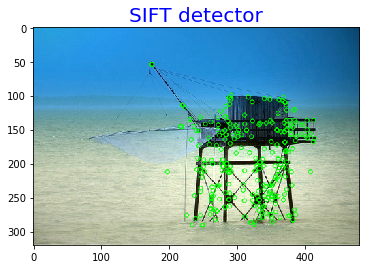

In [7]:
#sift detector

img = cv2.imread('./images/fishing_house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
#keypoint
keypoint = sift.detect(gray, None)
print('Number of keypoint:', len(keypoint))

keypoint, descriptor = sift.compute(gray, keypoint)

cv2.drawKeypoints(img, keypoint, img, color=(0,255,0))

plt.imshow(img)
plt.title('SIFT detector', fontsize=20, color='b')
plt.show()

Number of keypoint: 51


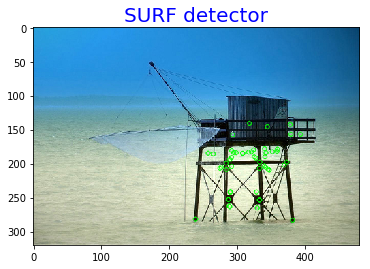

In [8]:
#surf detector

img = cv2.imread('./images/fishing_house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create()
surf.setHessianThreshold(15000)

keypoint, descriptor = surf.detectAndCompute(gray, None)
print('Number of keypoint:', len(keypoint))

cv2.drawKeypoints(img, keypoint, img, color=(0,255,0))

plt.imshow(img)
plt.title('SURF detector', fontsize=20, color='b')
plt.show()